In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [84]:
# loading data
life_data_path = "G:\CODE\Data Analytics Bootcamp\Data_Analytics\Class_Folder\Project 1\project1\Life Expectancy Data.csv"
life_df = pd.read_csv(life_data_path)

In [ ]:
# data cleaning
clean_ld = life_df.dropna()

In [90]:
# Summary of potential Life expctancy factors by nation
potential_le_factors = ['Country', 'Status','infant deaths', 'Life expectancy ', 
                        'Alcohol', 'percentage expenditure', 'Hepatitis B','Measles ', 
                        ' BMI ','Polio', 'Total expenditure','Diphtheria ', 
                        ' HIV/AIDS', 'GDP', 'Population',' thinness  1-19 years', 
                        ' thinness 5-9 years','Schooling']

inital_summary = clean_ld.groupby("Country")[potential_le_factors].agg("mean")
nation_statuses =clean_ld[["Country","Status"]].drop_duplicates()
summary_by_nation = pd.merge(inital_summary, nation_statuses , on=["Country"])

In [93]:
# Charting LE Results
def chart_Life_Expectancy(factor):
    summary_by_nation.plot(x=factor,y='Life expectancy ',kind="scatter")
    summ_lr = plt.linregress(summary_by_nation[factor], summary_by_nation["Life expectancy "])
    lr_b = summ_lr["int"]
    lr_m = summ_lr["slope"]

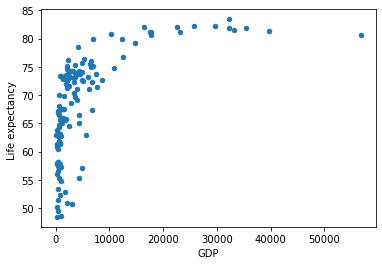

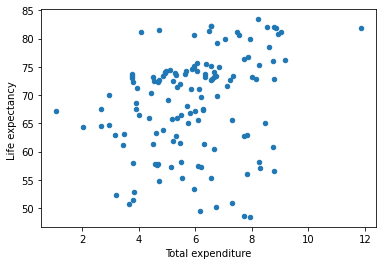

In [95]:
chart_Life_Expectancy("GDP")
chart_Life_Expectancy(potential_le_factors[10])
